# Visualizing FordGoBike Data 2017
## by Mohmmad Alwakeel

## Investigation Overview

The FordGoBike 2017 is a straightforward and easy to understand and work with data set. This data set has been collected efficiently, providing an amazing collection of data to draw conclusions.




## Dataset Overview

This data was collected between Jun and Dec 2017. it has around 450000 rows, which consist of bike rides in San Francisco, California, US.
The columns are as follows:

- Trip Duration (seconds)
- Start and End Time and Date
- Start Station ID
- Start Station Name
- Start Station Latitude
- Start Station Longitude
- End Station ID
- End Station Name
- End Station Latitude
- End Station Longitude
- Bike ID
- User Type
- Member Year Birth
- Member Gender

 I added the following columns:

- Member Age
- Distance (km)
- Trip Duration (minuts)

In [30]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import datetime
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [31]:
# load in the dataset into a pandas dataframe
df_clean = pd.read_csv('FordGo_2017.csv')

df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,member_age,dist_km,duration_min
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male,30,0.942931,1335
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female,52,3.069727,1313
2,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female,20,0.636339,726
3,4507,2017-12-31 23:49:28.422,2018-01-01 01:04:35.619,259,Addison St at Fourth St,37.866249,-122.299371,259,Addison St at Fourth St,37.866249,-122.299371,3539,Customer,1991.0,Female,26,0.000000,75
4,2183,2017-12-31 23:52:55.581,2018-01-01 00:29:18.743,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,24,Spear St at Folsom St,37.789677,-122.390428,2311,Subscriber,1990.0,Male,27,1.517348,36


In [32]:
# Changing the format to datetime
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])
df_clean['end_time'] = pd.to_datetime(df_clean['end_time'])

In [16]:
df_clean.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                    int64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                      int64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                 float64
member_gender                      object
member_age                          int64
dist_km                           float64
duration_min                        int64
dtype: object

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## FordGo bike usage by month

 *Observation 1: Down below, we can see that the summer months and early-mid autumn are the most popular times to use the Ford Go Bike sharing system, probably because it's the time of a holiday. As we can see, October is the most crowd month, followed by November and September, where they come very close to each other. Furthermore, December comes as the third most crowd, and then August, July, Jun, respectively. Looking closely, at the graph we can see that weather and holidays where the two main factors to determine the count of bike rides.*

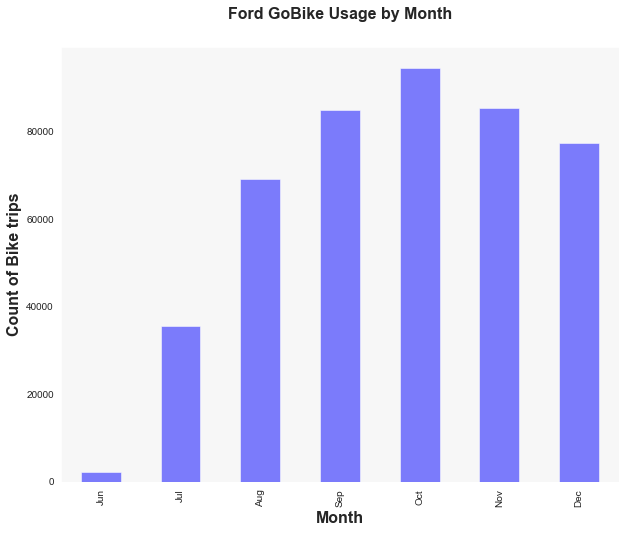

In [33]:
# Monthly usage of the Ford Go Bike system
df_clean.groupby(df_clean.start_time.dt.to_period('M'))['bike_id'].count().plot(kind= 'bar', figsize= (10,8), color= 'b', alpha= 0.5)
plt.xticks(np.arange(7), ('Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'))
sns.set_style("whitegrid")
plt.xlabel('Month', fontsize = 16, fontweight = 'bold')
plt.ylabel('Count of Bike trips',fontsize = 16, fontweight = 'bold')
plt.title('Ford GoBike Usage by Month', y = 1.05, fontsize = 16, fontweight = 'bold');

## FordGo bike usage by days

 *Observation 2: As we can see below, Tuesdays and Wednesdays seem to be the most popular days for using the FordGo bike system. Nevertheless, Thursdays, Mondays and Fridays are very close to each other’s and very close to the Tues/Weds numbers. The usage reduces sharply on Saturdays and Sundays showing the FordGo bike system is used intensively during working days.*

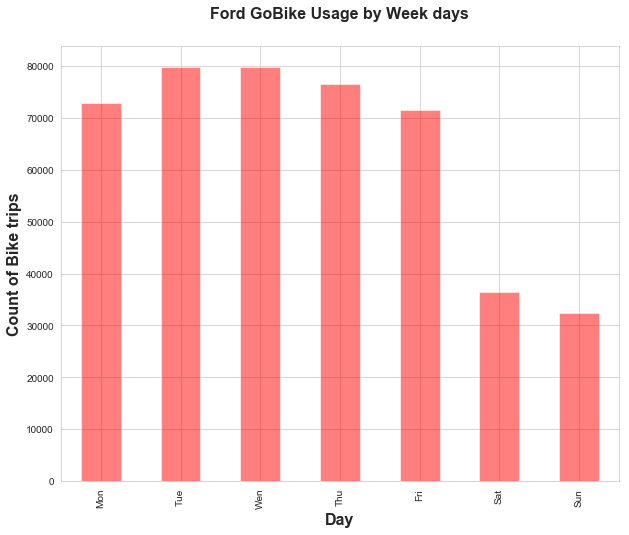

In [34]:
# Days of the week usage of the Ford Go Bike system
df_clean.groupby(df_clean.start_time.dt.dayofweek)['bike_id'].count().plot(kind= 'bar', figsize= (10,8), color= 'r', alpha= 0.5)
plt.xticks(np.arange(7), ('Mon', 'Tue', 'Wen', 'Thu', 'Fri', 'Sat', 'Sun'))
sns.set_style("whitegrid")
plt.xlabel('Day', fontsize = 16, fontweight = 'bold')
plt.ylabel('Count of Bike trips',fontsize = 16, fontweight = 'bold')
plt.title('Ford GoBike Usage by Week days', y = 1.05, fontsize = 16, fontweight = 'bold');

## FordGo bike usage by day hours

 *Observation 3: The bikes trips' data shows that the most usage is during the morning hours of 8-9 AM, and in the afternoon to evening hours from 5-6 PM, which is a typical a go to and back from wok time. This supports the previous observation which suggest that the bikes are being used primarily for working purposes.*

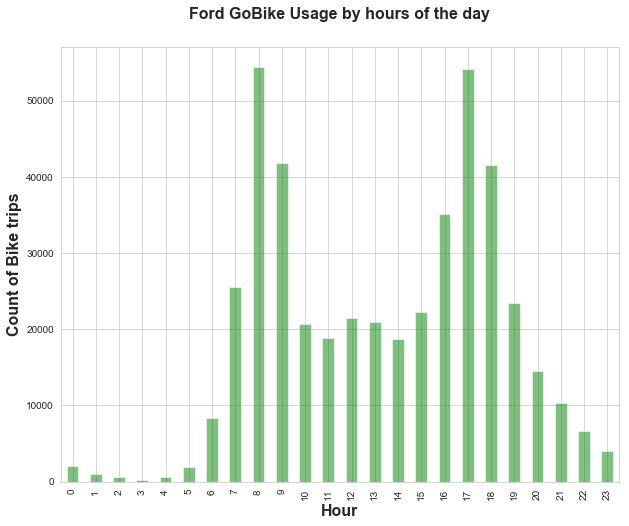

In [35]:
# Hours of the days usage of the Ford Go Bike system
df_clean.groupby(df_clean.start_time.dt.hour)['bike_id'].count().plot(kind= 'bar', figsize= (10,8), color= 'g', alpha= 0.5)
sns.set_style("whitegrid")
plt.xlabel('Hour', fontsize = 16, fontweight = 'bold')
plt.ylabel('Count of Bike trips',fontsize = 16, fontweight = 'bold')
plt.title('Ford GoBike Usage by hours of the day', y = 1.05, fontsize = 16, fontweight = 'bold');

## Ford Go Bike System - Duration (Min) by User Type

 *The plots down there show the ride duration spread in minutes. Customers and Subscribers have an almost identical spread. However, after limiting the spread to 30 we can see that Customer have longer trip durations (9 to 23 minutes according to the box plot) than for subscribers (5 to 13 minutes according to the box plot). This can probably be explained by the fact that subscribers are mainly commuters who take short trips to work/school rather than longer trips around San Francisco.*

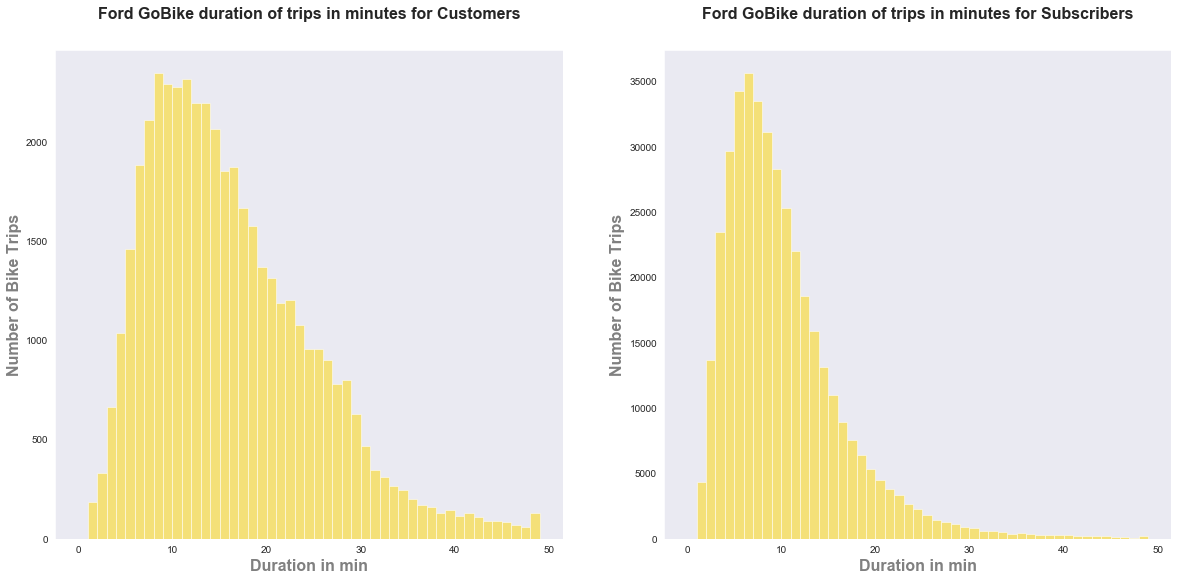

In [38]:
# Customer Usage by Duration vs. Subscriber Usage by Duration in minuts and seconds.
plt.figure(figsize=(20,9))
plt.subplot(1, 2, 1)
xbins_min_cus = np.arange(0, 50)
plt.hist(data = df_clean.query('user_type == "Customer"'), x = 'duration_min', bins = xbins_min_cus, color= 'gold', alpha= 0.5);
sns.set_style("dark")
plt.xlabel('Duration in min', fontsize = 16, fontweight = 'bold', color='grey')
plt.ylabel('Number of Bike Trips',fontsize = 16, fontweight = 'bold', color='grey')
plt.title('Ford GoBike duration of trips in minutes for Customers', y = 1.05, fontsize = 16, fontweight = 'bold')



plt.subplot(1, 2, 2)
xbins_min_sub = np.arange(0, 50)
plt.hist(data = df_clean.query('user_type == "Subscriber"'), x = 'duration_min', bins = xbins_min_sub, color= 'gold', alpha= 0.5);
sns.set_style("dark")
plt.xlabel('Duration in min', fontsize = 16, fontweight = 'bold', color='grey')
plt.ylabel('Number of Bike Trips',fontsize = 16, fontweight = 'bold', color='grey')
plt.title('Ford GoBike duration of trips in minutes for Subscribers', y = 1.05, fontsize = 16, fontweight = 'bold');

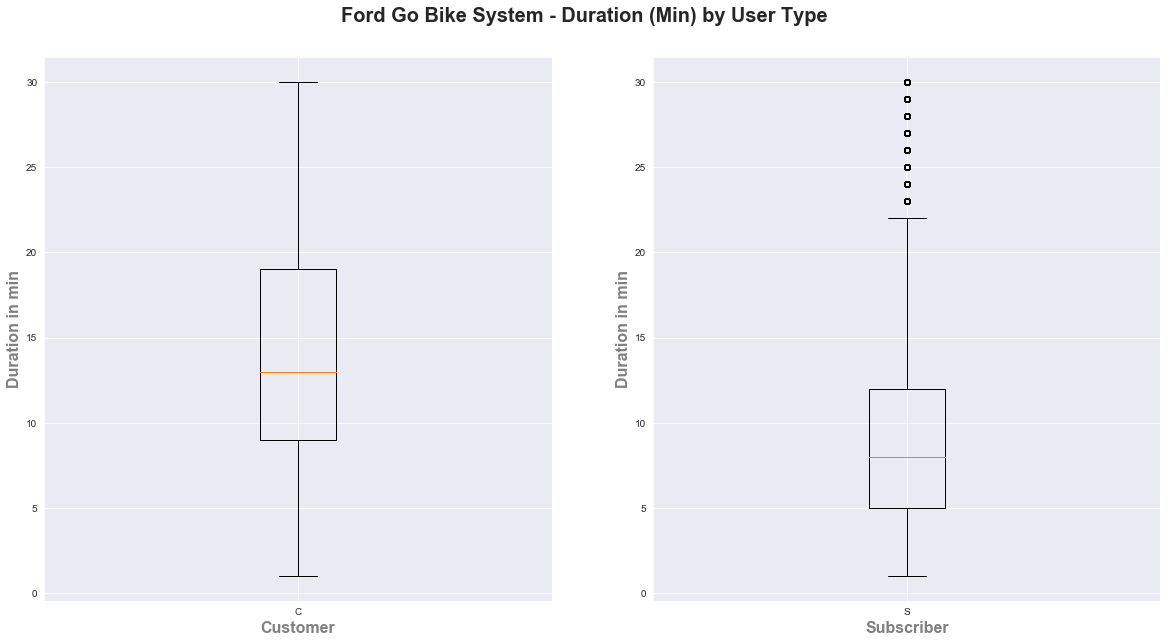

In [40]:
# Customer Usage by Duration vs. Subscriber Usage by Duration in minuts and seconds.

data_C = df_clean.query('duration_min <= 30').query('user_type == "Customer"')
data_S = df_clean.query('duration_min <= 30').query('user_type == "Subscriber"')
# To make the box visable and understnadble
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.boxplot(data = data_C, x = data_C['duration_min'], labels= "C")
sns.set_style("darkgrid")
plt.xlabel('Customer',fontsize = 16, fontweight = 'bold', color='grey')
plt.ylabel('Duration in min',fontsize = 16, fontweight = 'bold', color='grey')
plt.suptitle('Ford Go Bike System - Duration (Min) by User Type', y=0.95, fontsize=20, fontweight='bold');

plt.subplot(1, 2, 2)
plt.boxplot(data = data_S, x = data_S['duration_min'], labels= "S")
sns.set_style("darkgrid")
plt.xlabel('Subscriber',fontsize = 16, fontweight = 'bold', color='grey')
plt.ylabel('Duration in min', fontsize = 16, fontweight = 'bold', color='grey');



## Ford Go Bike System - Monthly Bike Trips Per Age Group

 Bike sharing system members who fall in the age group between 26 - 35 years old are the most common age group to use the bike sharing system. Members who fall in the 36-45 year old age group are the next most common age group to use the bike sharing system, and follow almost the same trend. The youngest age group, the 15-25 years old starts off with very few rides in June, but generally increase throughout the year when they reach their first spike in July, with a slight dip during November to September. This follows the traditional school year, with the summer months of June - September designated as a break from school.*

In [42]:
df_clean['age_bins'] = df_clean['member_age'].apply(lambda x: '15 - 25' if 15<x<=25
                                                  else '26 - 35' if 25<x<=35
                                                  else '36 - 45' if 35<x<=45
                                                  else '46 - 55' if 45<x<=55
                                                  else '56 - 66' if 55<x<=66
                                                       else x)

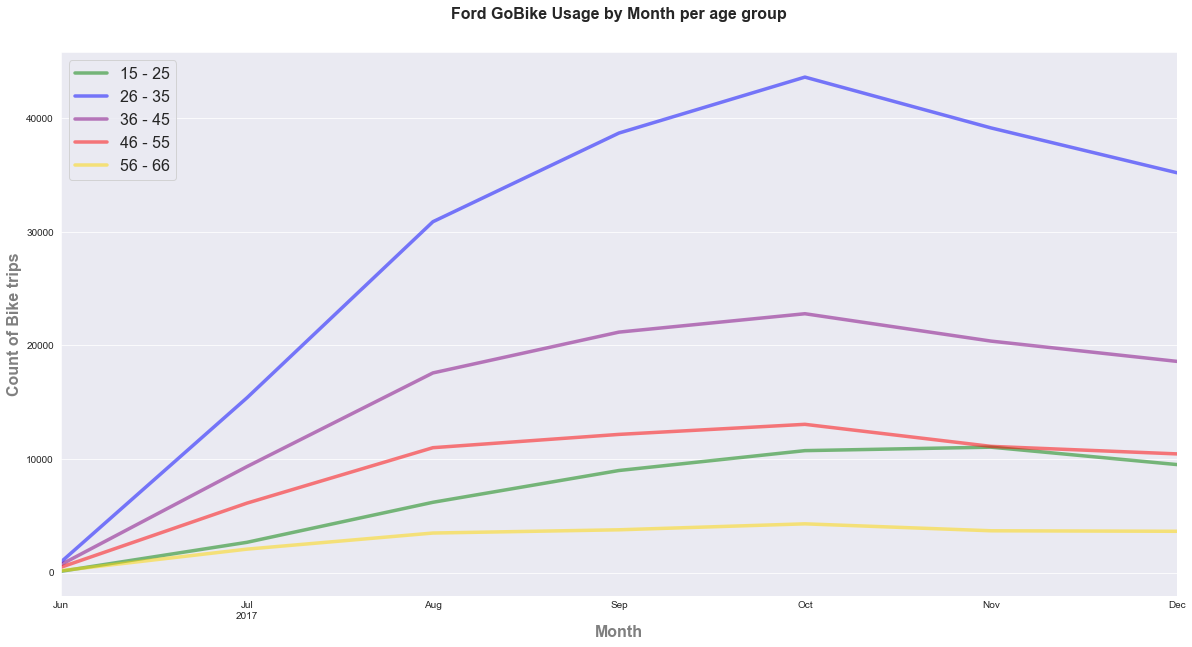

In [43]:
plt.xticks(np.arange(7), ('Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'))
df_clean.query('age_bins == "15 - 25"').groupby(df_clean.start_time.dt.to_period('M'))['bike_id'].count().plot(kind= 'line', color= 'green', linewidth= 3.5, figsize= (20,10), alpha= 0.5)
df_clean.query('age_bins == "26 - 35"').groupby(df_clean.start_time.dt.to_period('M'))['bike_id'].count().plot(kind= 'line', color= 'blue', linewidth= 3.5, figsize= (20,10), alpha= 0.5)
df_clean.query('age_bins == "36 - 45"').groupby(df_clean.start_time.dt.to_period('M'))['bike_id'].count().plot(kind= 'line', color= 'purple', linewidth= 3.5, figsize= (20,10), alpha= 0.5)
df_clean.query('age_bins == "46 - 55"').groupby(df_clean.start_time.dt.to_period('M'))['bike_id'].count().plot(kind= 'line', color= 'red', linewidth= 3.5, figsize= (20,10), alpha= 0.5)
df_clean.query('age_bins == "56 - 66"').groupby(df_clean.start_time.dt.to_period('M'))['bike_id'].count().plot(kind= 'line', color= 'gold', linewidth= 3.5, figsize= (20,10), alpha= 0.5)


plt.xlabel('Month', fontsize = 16, fontweight = 'bold', color= 'grey')
plt.ylabel('Count of Bike trips',fontsize = 16, fontweight = 'bold', color= 'grey')
plt.legend(labels=  ["15 - 25","26 - 35", "36 - 45", "46 - 55","56 - 66"], fontsize = 16)
sns.set_style("dark", {"axes.facecolor": "9"})
plt.title('Ford GoBike Usage by Month per age group', y = 1.05, fontsize = 16, fontweight = 'bold');


## Ford Go Bike System - day hours vs. Weekday by User Type

 *Intro: Customers use the FordGo bike system on weekends than Subscribers. Also, Subscribers primarily use the bikes on weekdays.*

 *Customers: During weekdays, most bike rides occur between 4-6pm, peaking on Fridays around 5pm. During weekends, most bike rides occur between 11am and 6pm, peaking on Saturdays around 2pm.*

 *Subscribers: During weekdays, most bike rides occur around 9am till 7pm. During weekends, there is a reduction in the number of used bikes.*

In [44]:
df_clean['df_clean_start_hour'] = df_clean.start_time.dt.hour
df_clean['df_clean_start_days'] = df_clean.start_time.dt.dayofweek

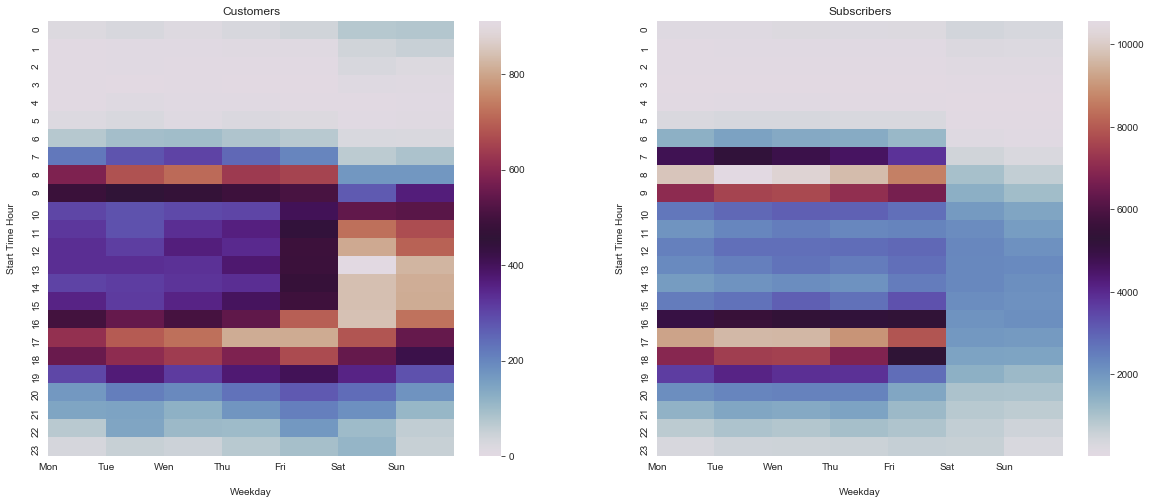

In [29]:
# Heatmap - Subscribers and Customers

plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
df_subscriber = df_clean.query('user_type == "Customer"').groupby(['df_clean_start_days', 'df_clean_start_hour'])['bike_id'].size().reset_index()
df_subscriber = df_subscriber.pivot('df_clean_start_hour', 'df_clean_start_days', 'bike_id')
sns.heatmap(df_subscriber, cmap = 'twilight')
plt.title("Customers", y=1.05)
plt.xticks(np.arange(7), ('Mon', 'Tue', 'Wen', 'Thu', 'Fri', 'Sat', 'Sun'))
plt.xlabel('Weekday', labelpad = 16)
plt.ylabel('Start Time Hour', labelpad = 16);


plt.subplot(1, 2, 2)
df_subscriber = df_clean.query('user_type == "Subscriber"').groupby(['df_clean_start_days', 'df_clean_start_hour'])['bike_id'].size().reset_index()
df_subscriber = df_subscriber.pivot('df_clean_start_hour', 'df_clean_start_days', 'bike_id')
sns.heatmap(df_subscriber, cmap = 'twilight')
plt.title("Subscribers", y=1.05)
plt.xticks(np.arange(7), ('Mon', 'Tue', 'Wen', 'Thu', 'Fri', 'Sat', 'Sun'))
plt.xlabel('Weekday', labelpad = 16)
plt.ylabel('Start Time Hour', labelpad = 16);

The End